In [1]:
from sklearn.utils import shuffle
import random
import _pickle as pickle
from sklearn.preprocessing import normalize

%run data.py
%run images_proc.py
%run cnn.py


In [22]:
x_data, y_data = load_data('../../datasets/traffic-signs-data/test.p')

In [23]:
img_shape = x_data.shape
norm_images = np.zeros((img_shape[0], img_shape[1], img_shape[2], 1))
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
for i in range(0, len(x_data)):
    n_img = x_data[i]
    n_img = cv2.cvtColor(n_img, cv2.COLOR_RGB2GRAY)
    n_img = cv2.equalizeHist(n_img)
    n_img = cv2.filter2D(n_img, -1, kernel_sharpen_1)
    n_img = normalize(n_img)
    norm_images[i] = np.reshape(n_img, (32, 32, 1))


/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


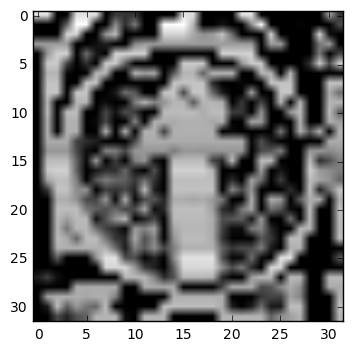

In [24]:
plt.imshow(np.reshape(norm_images[9],(32,32)), cmap='gray')
plt.show()

In [9]:
jtr_each_cat = np.zeros(np.max(y_data)+1)
jtr_each_cat.fill(8)
jtr_each_cat =jtr_each_cat.astype(int)
#print('min: {} max:{}'.format(np.min(counts), np.max(counts)))
unique, counts = np.unique(y_data, return_counts=True)

In [45]:
unique, counts = np.unique(y_data, return_counts=True)
max_cat = np.max(counts)
for idx, cat in enumerate(counts):
    
    if cat<(max_cat):
        
        new_val = (max_cat - cat)/cat
        print('{} - {} : {}'.format(idx,new_val,cat))
        jtr_each_cat[idx] = int((max(1,(new_val*0.3))*8))
    else:
        jtr_each_cat[idx]=8
        

0 - 9.714285714285714 : 210
1 - 0.013513513513513514 : 2220
3 - 0.5957446808510638 : 1410
4 - 0.13636363636363635 : 1980
5 - 0.20967741935483872 : 1860
6 - 4.357142857142857 : 420
7 - 0.5625 : 1440
8 - 0.5957446808510638 : 1410
9 - 0.5306122448979592 : 1470
10 - 0.11940298507462686 : 2010
11 - 0.7045454545454546 : 1320
12 - 0.07142857142857142 : 2100
13 - 0.041666666666666664 : 2160
14 - 1.8846153846153846 : 780
15 - 2.5714285714285716 : 630
16 - 4.357142857142857 : 420
17 - 1.027027027027027 : 1110
18 - 0.875 : 1200
19 - 9.714285714285714 : 210
20 - 5.25 : 360
21 - 5.818181818181818 : 330
22 - 4.769230769230769 : 390
23 - 3.411764705882353 : 510
24 - 7.333333333333333 : 270
25 - 0.5 : 1500
26 - 2.75 : 600
27 - 8.375 : 240
28 - 3.1666666666666665 : 540
29 - 7.333333333333333 : 270
30 - 4.0 : 450
31 - 1.8846153846153846 : 780
32 - 8.375 : 240
33 - 2.265602322206096 : 689
34 - 4.357142857142857 : 420
35 - 0.875 : 1200
36 - 4.769230769230769 : 390
37 - 9.714285714285714 : 210
38 - 0.08695

In [10]:
jtr_each_cat = jtr_each_cat
jtr_each_cat

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [11]:
np.sum((counts*jtr_each_cat))
total_counts = np.sum((counts*jtr_each_cat))

In [12]:
2250

2250

In [13]:
def jitter(n_img):
    rows, cols = 32, 32
    n_img = np.reshape(n_img, (32,32))
    M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randint(-15,15),random.uniform(0.9,1.1))
    n_img = cv2.warpAffine(n_img,M,(cols,rows))
    n_img = np.reshape(n_img, (32,32,1))
    return n_img

    
jtr_count = 8
expanded = np.zeros((total_counts, img_shape[1], img_shape[2], 1))
y_expanded = np.zeros(total_counts, dtype=int)
g_idx = 0
for i in range(0, img_shape[0]):
    jtr_count = jtr_each_cat[y_data[i]]
    n_img = norm_images[i]
    expanded[g_idx] = n_img
    y_expanded[g_idx] = y_data[i]
    g_idx=g_idx+1
    for j in range(1,jtr_count):
        expanded[g_idx] = jitter(n_img)
        y_expanded[g_idx] = y_data[i]
        g_idx=g_idx+1

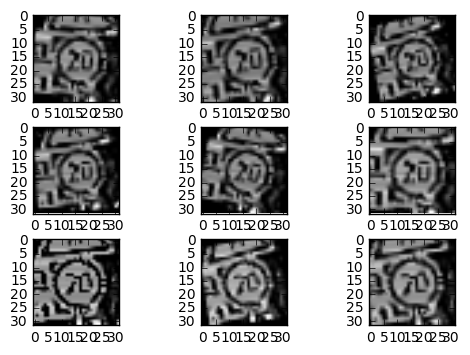

In [14]:
plot_images(expanded[10:19]).show()

In [15]:
y_data[len(y_data)-242:len(y_data)-239]

array([41, 41, 42], dtype=uint8)

In [16]:
y_expanded[len(y_expanded)-242*jtr_count:len(y_expanded)-239*jtr_count]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 42])

In [25]:
data = {'features':expanded, 'labels':y_expanded}
data = {'features':norm_images, 'labels':y_data}

In [26]:
pickle.dump( data, open( "../../datasets/expanded1_test.p", "wb" ) )

In [19]:
len(data)

2

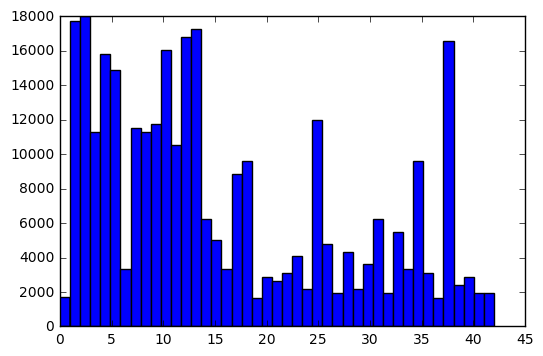

In [20]:
_=plt.hist(y_expanded, bins=43)
plt.show()

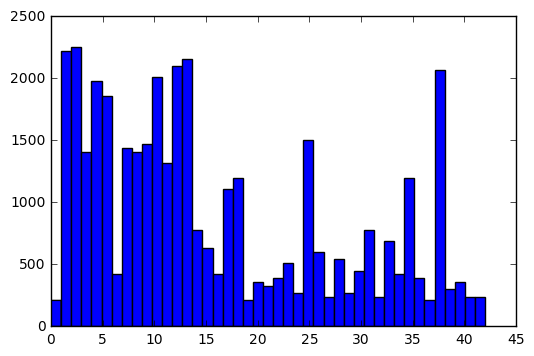

In [21]:
_=plt.hist(y_data, bins=43)
plt.show()